We are going to learn how to develop **anomaly detection** models. In machine learning, anomaly detection is used to identify rare or unusual patterns in data that do not conform to expected behavior. It is commonly applied in scenarios where abnormal events are of high interest, such as fraud detection, network security, and equipment fault diagnosis.

### Anomaly Detection in Machine Learning

Anomaly detection is a type of unsupervised learning task where the goal is to detect data points that deviate significantly from the norm. These deviations are often referred to as anomalies, outliers, or novelties. Unlike clustering, which groups data based on similarities, anomaly detection focuses on finding those instances that are dissimilar to the majority of the data.

#### Key Concepts in Anomaly Detection

1. **Unsupervised Learning**:
   - Anomaly detection typically falls under the category of unsupervised learning, as we often do not have labeled data. The algorithm learns the "normal" patterns in the data and identifies deviations that may represent anomalies.

2. **Anomalies**:
   - Anomalies (also known as outliers) are data points that are rare and do not conform to the general pattern of the dataset. These points can be caused by errors, fraud, or unexpected events.
   - **Point anomalies**: A single instance of data is anomalous with respect to the rest.
   - **Contextual anomalies**: A data point is anomalous in a specific context (e.g., a high temperature in winter).
   - **Collective anomalies**: A group of related data points is anomalous with respect to the whole dataset.

3. **Normal vs. Anomalous Data**:
   - The majority of the data represents normal behavior, and only a small portion is expected to be anomalous. Anomaly detection is essentially the task of separating these few abnormal points from the bulk of normal data.

4. **Similarity Metrics**:
   - Similar to clustering, anomaly detection uses similarity or distance metrics to determine how far an anomaly is from normal data points. Common metrics include Euclidean distance, Mahalanobis distance, and cosine similarity.

5. **Types of Anomaly Detection**:
   - **Supervised Anomaly Detection**: Uses labeled data where anomalies are explicitly tagged, which is less common due to the scarcity of labeled anomalies.
   - **Unsupervised Anomaly Detection**: Learns normal patterns from unlabeled data and detects deviations.
   - **Semi-supervised Anomaly Detection**: Trains on a dataset of normal instances and identifies deviations from the learned normality.

6. **Applications of Anomaly Detection**:
   - **Fraud Detection**: Identifying fraudulent transactions or activities.
   - **Network Security**: Detecting unusual network traffic that may indicate a security breach.
   - **Healthcare**: Monitoring patient data for abnormal patterns that could indicate disease.
   - **Manufacturing**: Detecting faults or malfunctions in equipment.

#### Popular Anomaly Detection Algorithms

There are several algorithms commonly used for anomaly detection, ranging from classical statistical methods to modern machine learning approaches:

1. **Isolation Forest**:
   - Based on the principle that anomalies are few and different, this algorithm isolates anomalies by randomly partitioning the data. The points that require fewer partitions to be isolated are considered anomalies.

2. **One-Class SVM**:
   - A variant of Support Vector Machines (SVMs) used for anomaly detection. It finds a boundary that separates the normal data from anomalies.

3. **Autoencoders**:
   - A type of neural network used in unsupervised learning. The autoencoder learns to compress the data (encoder) and reconstruct it (decoder). Data that cannot be well reconstructed by the autoencoder may represent anomalies.

4. **Gaussian Mixture Models (GMM)**:
   - A probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions. Anomalies are detected by looking at data points with low likelihood under the model.

5. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
   - A clustering algorithm that identifies regions of high-density data. Points that are in low-density regions are considered noise or outliers (anomalies).

One of the most known algo for Anomalies detection is LOF (Local Outlier Factor)

### Local Outlier Factor (LOF) Algorithm

The **Local Outlier Factor (LOF)** is an unsupervised anomaly detection algorithm that measures the local density deviation of a given data point with respect to its neighbors. The key idea behind LOF is that anomalies are points that have a much lower density compared to their neighbors.

#### Key Concepts of LOF:

1. **Local Density**:
   - LOF calculates the local density of each data point by comparing its distance to its nearest neighbors. The algorithm uses the concept of **k-nearest neighbors** (k-NN) to evaluate how isolated a data point is compared to the points surrounding it.

2. **Reachability Distance**:
   - The reachability distance of a point A with respect to point B is defined as the maximum of the Euclidean distance between A and B and the distance between B and its k-th nearest neighbor. This distance ensures that local density is not overly affected by very close points.

3. **Local Reachability Density (LRD)**:
   - The local reachability density of a point is the inverse of the average reachability distance to its k-nearest neighbors. A lower LRD means the point is located in a sparse region, indicating the possibility of it being an outlier.

4. **Local Outlier Factor (LOF)**:
   - The LOF score is calculated as the ratio of the local reachability density of a point and the local reachability density of its neighbors. A high LOF score means the point is in a region of significantly lower density compared to its neighbors, marking it as a potential outlier.
   - LOF values close to 1 indicate that the point is in a region of similar density as its neighbors (normal behavior).
   - LOF values greater than 1 indicate that the point is an outlier (anomalous behavior).

#### How LOF Works:

1. **Determine the Neighbors**:
   - For each data point, determine its k-nearest neighbors based on a distance metric such as Euclidean distance.

2. **Compute Reachability Distance**:
   - Calculate the reachability distance for each point with respect to its neighbors to smooth the effects of outliers that might be close to the point.

3. **Calculate Local Reachability Density**:
   - For each point, calculate the local reachability density by averaging the reachability distances of its neighbors.

4. **Compute the LOF Score**:
   - For each point, calculate the LOF score by comparing its local reachability density to the local reachability density of its neighbors.

5. **Anomaly Detection**:
   - Points with LOF scores significantly greater than 1 are considered anomalies, as they exist in regions of lower density compared to their surroundings.

#### Advantages of LOF:

- **Density-Based**: LOF detects anomalies by comparing the density of a point to its neighbors, making it sensitive to local variations in the data.
- **No Assumptions on Data Shape**: Unlike algorithms like K-Means, LOF does not assume a particular shape of the data distribution (e.g., spherical clusters).
- **Local Sensitivity**: LOF is particularly useful in detecting anomalies in datasets with varying densities, as it evaluates points based on their local neighborhood.

#### Limitations of LOF:

- **Sensitive to Parameters**: The choice of the number of neighbors (k) can significantly impact the results, and finding an optimal k can be challenging.
- **Computational Complexity**: LOF can be computationally expensive for large datasets, as it requires calculating distances between all points and their neighbors.

#### Example Use Cases:

- **Credit Card Fraud Detection**: Detecting unusual transactions by comparing the density of transactions for an individual account.
- **Network Intrusion Detection**: Identifying irregular network traffic patterns that differ from normal activity.
- **Fault Detection in Industrial Systems**: Finding abnormal operational conditions in systems by detecting outlier sensor readings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#generate synthetic dataset (normal data + anomalies)
rng = np.random.RandomState(2024)

#create 1000 normal points
X_inliers = 0.3 * rng.randn(1000,2)

#create 20 anomlous points
X_outliers = rng.uniform(low=4, high=4, size=(20,2))

#combine the datasets
X = np.concatenate([X_inliers, X_outliers], axis=0)

#instatiate the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)

#fit the model and predic
y_pred = lof.fit_predict(X)

#identify the anomalies
anomalies = np.where(y_pred == -1)

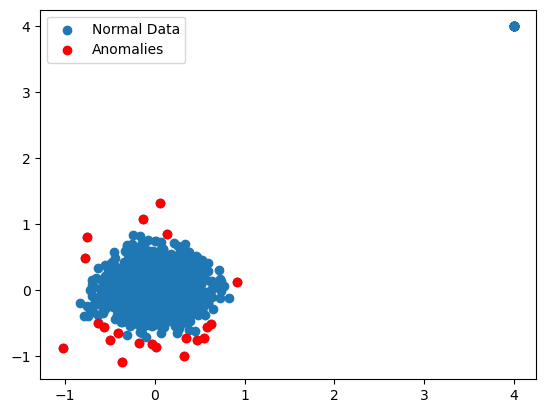

In [3]:
#plot the results
plt.scatter(X[:,0], X[:,1], label="Normal Data")
plt.scatter(X[anomalies,0], X[anomalies,1], color='red', label="Anomalies")
plt.legend()

Here’s a basic implementation of Isolation Forest in Python using the sklearn library:

In [4]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [5]:
#generate synthetic data 

# 1000 normal data points
X = 0.3 * rng.randn(1000,2)

# 20 anomalous data points
X_anomalous = rng.uniform(low=4, high=4, size=(20,2))
X = np.concatenate([X, X_anomalous], axis=0)

#train isolation forest
model = IsolationForest(contamination=0.02, random_state=2024)
model.fit(X)


IsolationForest(contamination=0.02, random_state=2024)

In [15]:
predictions = model.predict(X)

# Identify the anomaly and normal indices
anomalies = np.where(predictions == -1)
normal = np.where(predictions == 1)

print(f"Number of anomalies detected: {len(anomalies[0])}")

Number of anomalies detected: 21
